<a href="https://colab.research.google.com/github/bjkarki/4140Steel-MechanicalProperties/blob/master/StressStrain_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## This code will take import tensile test data for a 4140 steel
## We will graph a stress-strain curve.
## Finally, we will calcualte the yield stress of the curve.

In [0]:
##Import the required libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import xlrd
%matplotlib inline
import numpy as np
from numpy import diff
from scipy.signal import savgol_filter

In [3]:
##Import the required data file
## The file name here is: StressStrain_Data.xlsx
data_file = "/content/StressStrain_Data.xlsx"
data = pd.read_excel(data_file,'Sheet2', header=None,skiprows=3)
data.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,0.000027,4.173063,NaN,-0.000014,6.572941,NaN,0.004069,4.671372,NaN,0.011057,4.111792
1,0.000027,4.139527,NaN,-0.000014,6.562461,NaN,0.004069,4.646721,NaN,0.011064,4.095137
2,0.001182,8.222464,NaN,0.000534,9.601608,NaN,0.005944,8.204688,NaN,0.021685,10.998784
3,0.002751,11.391560,NaN,0.001048,11.072974,NaN,0.007819,12.609008,NaN,0.026381,18.189734
4,0.003995,14.332197,NaN,0.001801,11.749970,NaN,0.009097,16.419649,NaN,0.028950,25.447310
5,0.005469,18.595385,NaN,0.002219,12.366183,NaN,0.010375,20.554862,NaN,0.031298,32.573721
6,0.006732,22.973853,NaN,0.002822,13.393205,NaN,0.011451,23.999844,NaN,0.033439,39.979109
7,0.007982,27.494846,NaN,0.003233,14.137272,NaN,0.012528,27.473587,NaN,0.035145,46.836955
8,0.009239,32.235916,NaN,0.003658,14.860379,NaN,0.013792,31.551281,NaN,0.036630,54.560879
9,0.010285,36.490720,NaN,0.004308,15.939801,NaN,0.014868,35.121572,NaN,0.037901,62.778212


In [4]:
## Cold formed 4140 steel
ColdFormedSteel = data.iloc[:,6:8].dropna()
ColdFormedSteel.head(10)

,6,7
0,0.004069,4.671372
1,0.004069,4.646721
2,0.005944,8.204688
3,0.007819,12.609008
4,0.009097,16.419649
5,0.010375,20.554862
6,0.011451,23.999844
7,0.012528,27.473587
8,0.013792,31.551281
9,0.014868,35.121572


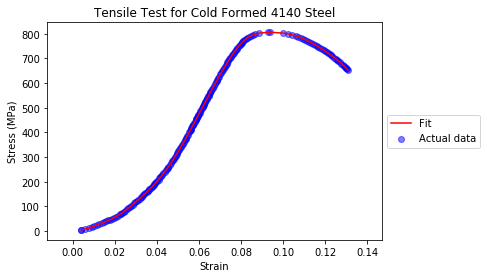

In [5]:
##Plot the stress strain curve
strain = np.array(ColdFormedSteel[6])
stress = np.array(ColdFormedSteel[7])
smooth_stress = savgol_filter(stress,5,4)
plt.scatter(strain,stress,c='b',alpha=0.5)
plt.plot(strain,smooth_stress,'r')
plt.title('Tensile Test for Cold Formed 4140 Steel')
plt.xlabel('Strain')
plt.ylabel('Stress (MPa)')
plt.legend(['Fit','Actual data'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


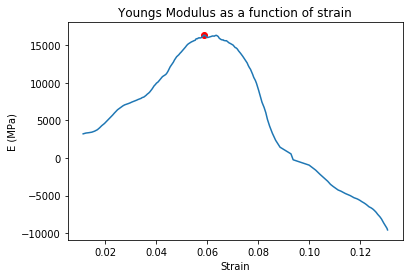

In [6]:
## Plot Young's Modulus as a function of strain
E = np.gradient(smooth_stress) / np.gradient(strain)
E = savgol_filter(E,11,2)
# Plot strain vs. E
plt.plot(strain,E)
plt.title('Young''s Modulus as a function of strain')
plt.xlabel('Strain')
plt.ylabel('E (MPa)')
# Remove nan's and inf to identify the max E
E[np.isnan(E)] = 0
E[np.isinf(E)] = 0
E[np.isneginf(E)] = 0
i = np.argmax(E)
# Plot location of max E
plt.scatter(strain[i],E[i],c = 'r')
plt.show()

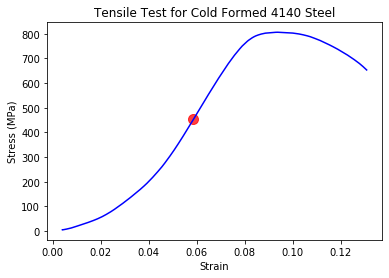

In [7]:
## Plot where the maximum E is in stress vs strain curve
plt.plot(strain,smooth_stress,c='b')
plt.scatter(strain[i],smooth_stress[i],c = 'r',s=100,alpha=0.75)
plt.title('Tensile Test for Cold Formed 4140 Steel')
plt.xlabel('Strain')
plt.ylabel('Stress (MPa)')
plt.show()

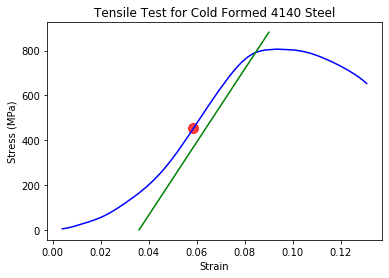

In [8]:
## Plot showing yield stress
plt.plot(strain,smooth_stress,c='b')
plt.scatter(strain[i],smooth_stress[i],c = 'r',s=100,alpha=0.75)
plt.title('Tensile Test for Cold Formed 4140 Steel')
plt.xlabel('Strain')
plt.ylabel('Stress (MPa)')
# Straight line with slope = max Youngs' Modulus
m = E[i]
# Where is the offset. Usually it is 0.002
xo = 0.036 # 0.002 doesn't fit here
x = np.linspace(xo,0.09,25)
y = m*(x-xo)
plt.plot(x,y,c='g')
plt.show()